In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import strategy.betting_logic as betting_logic
from data.data_prep import DataPrep
from pipelines.preprocessing import preprocess_pipeline
from model.train import train_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from backtest import cross_validate
import os

from pipelines.pipeline import get_pipeline
path = r"c:\Users\brtnl\OneDrive\Desktop\code\sports_betting"
os.chdir(path)

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
print("Step 1: Loading data...")
data_prep = DataPrep(dataset="cfb")
raw_data = data_prep.get_data()

Step 1: Loading data...


In [3]:
pl = get_pipeline()
s = pl.fit_transform(raw_data)

In [6]:
s

,attendance,home_pregame_elo,away_pregame_elo,home_classification_fbs,home_classification_fcs,home_classification_ii,home_classification_iii,home_classification_None,away_classification_fbs,away_classification_fcs,...,elevation,constructionyear,grass,total,home_days_since_last_game,away_days_since_last_game,home_rolling_3_mean_points_for,away_rolling_3_mean_points_for,home_rolling_5_mean_points_for,away_rolling_5_mean_points_for
0,20790.000000,1530.000000,1467.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,321.364166,1969.0,False,27.0,4989,4989,0.000000,0.000000,0.0,0.0
1,81572.000000,1759.000000,1638.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,60.545486,1934.0,True,37.0,4989,4989,0.000000,0.000000,0.0,0.0
2,26202.000000,1489.742857,1486.577094,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,283.548584,1968.0,False,38.0,4989,4989,0.000000,0.000000,0.0,0.0
3,39105.711675,1518.822206,1486.577094,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,192.875565,1950.0,False,51.0,4989,4989,0.000000,0.000000,0.0,0.0
4,40278.000000,1484.986301,1486.577094,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,231.650085,1960.0,False,108.0,4989,4989,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25612,39105.711675,1518.822206,1486.577094,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.681284,2012.0,True,66.0,15,15,44.666667,35.666667,43.6,36.8
25613,9519.625000,1518.822206,1486.577094,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,181.381592,2005.0,True,67.0,16,16,44.000000,36.666667,39.2,39.4
25614,50997.634146,2063.000000,2173.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.624486,1987.0,False,51.0,9,7,35.333333,33.000000,35.2,36.6
25615,58010.309524,2056.000000,2182.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,172.504730,2009.0,False,42.0,9,9,32.000000,31.000000,28.8,32.4


In [4]:
# raw_data, get odds_df, then plug everything into pipeline.

In [5]:
pl = preprocess_pipeline()
pl.fit_transform(raw_data).columns

Index(['venue', 'attendance', 'home_team', 'home_pregame_elo', 'away_team',
       'away_pregame_elo', 'home_classification_fbs',
       'home_classification_fcs', 'home_classification_ii',
       'home_classification_iii', 'home_classification_None',
       'away_classification_fbs', 'away_classification_fcs',
       'away_classification_ii', 'away_classification_iii',
       'away_classification_None', 'id', 'season', 'week', 'season_type',
       'start_date', 'neutral_site', 'conference_game', 'venue_id',
       'home_conference', 'home_points', 'home_line_scores',
       'home_postgame_win_probability', 'home_postgame_elo', 'away_conference',
       'away_points', 'away_line_scores', 'away_postgame_win_probability',
       'away_postgame_elo', 'excitement_index', 'latitude', 'longitude',
       'capacity', 'dome', 'timezone', 'elevation', 'constructionyear',
       'grass', 'min_ou', 'max_ou', 'ot', 'home_q1', 'home_q2', 'home_q3',
       'home_q4', 'home_ot', 'home_h1', 'home_h2'

In [6]:
print("Step 1: Loading data...")
data_prep = DataPrep(dataset="cfb")
raw_data = data_prep.get_data()

print("Step 2: Preprocessing data...")
preprocessor = Preprocessor(raw_data, "total")
odds_df, X, y = preprocessor.preprocess_data()

print("Step 3: Feature engineering...")
feature_pipeline = FeaturePipeline(X)
X = feature_pipeline.engineer_features()

Step 1: Loading data...
Step 2: Preprocessing data...


NameError: name 'Preprocessor' is not defined

In [ ]:
print("Step 4: Training and evaluating the model...")
model, df = cross_validate(odds_df, X, y, file_name="test_model")

Step 4: Training and evaluating the model...


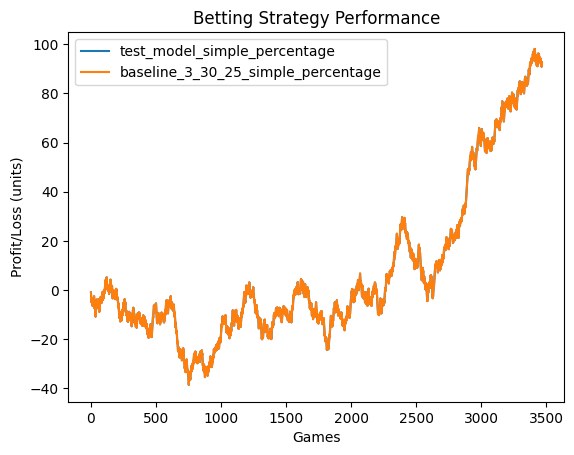

PNL delta from the model: 0.0 units
Model Performance (Booster): test_model
R2 Score:
 -0.0037382349244394764
MSE:
 345.24685666049453
MAE:
 14.754413642146481
             Feature  Percentage
14         elevation   13.694941
9           capacity   12.850774
15  excitement_index   12.075279
Model Performance (Booster): baseline_3_30_25
R2 Score:
 -0.0037382349244394764
MSE:
 345.24685666049453
MAE:
 14.754413642146481
             Feature  Percentage
14         elevation   13.694941
9           capacity   12.850774
15  excitement_index   12.075279


In [ ]:
model_metrics("test_model")

In [ ]:
# TODO: replace feature importance with a graph